### 1. Persiapan untuk EDA dan Pengumpulan Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import missingno

plt.style.use('ggplot')

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix , accuracy_score , classification_report, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn .ensemble import RandomForestClassifier 
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn_pandas import DataFrameMapper
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from matplotlib import pyplot



from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn_pandas import DataFrameMapper
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from matplotlib import pyplot


In [2]:
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
dataset.shape

(5110, 12)

In [4]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### 2. Menelaah Data


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
categorical_col = []
for column in dataset.columns:
    if dataset[column].dtype == object and len(dataset[column].unique()) <= 50: #mengecek level/isi data kolom (bisa object, int, dan tipe data lainnya)
        categorical_col.append(column)
        print(f"{column} : {dataset[column].unique()}")
        print("====================================")

gender : ['Male' 'Female' 'Other']
ever_married : ['Yes' 'No']
work_type : ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type : ['Urban' 'Rural']
smoking_status : ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [9]:
dataset.value_counts()

id     gender  age   hypertension  heart_disease  ever_married  work_type      Residence_type  avg_glucose_level  bmi   smoking_status   stroke
77     Female  13.0  0             0              No            children       Rural           85.81              18.6  Unknown          0         1
49605  Male    63.0  0             0              Yes           Private        Urban           74.39              31.0  formerly smoked  0         1
49661  Male    53.0  0             0              Yes           Govt_job       Urban           85.17              29.2  never smoked     0         1
49646  Male    72.0  0             1              Yes           Self-employed  Rural           113.63             26.5  Unknown          0         1
49645  Male    58.0  0             0              No            Private        Rural           76.22              22.2  formerly smoked  0         1
                                                                                                               

### 3. Memvalidasi data dengan mencari missing value

In [10]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
dataset.duplicated().any()

False

In [12]:
dataset.fillna({"bmi":dataset['bmi'].mean().round(1)}, inplace=True)
dataset['bmi'].head()

0    36.6
1    28.9
2    32.5
3    34.4
4    24.0
Name: bmi, dtype: float64

In [13]:
###cat_features = ['work_type', 'gender', 'Residence_type', 'smoking_status', 'ever_married'] # categorical features
####num_features = ['age', 'avg_glucose_level', 'bmi'] 

### Temuan : Hasil pengecekan tidak ada data missing value

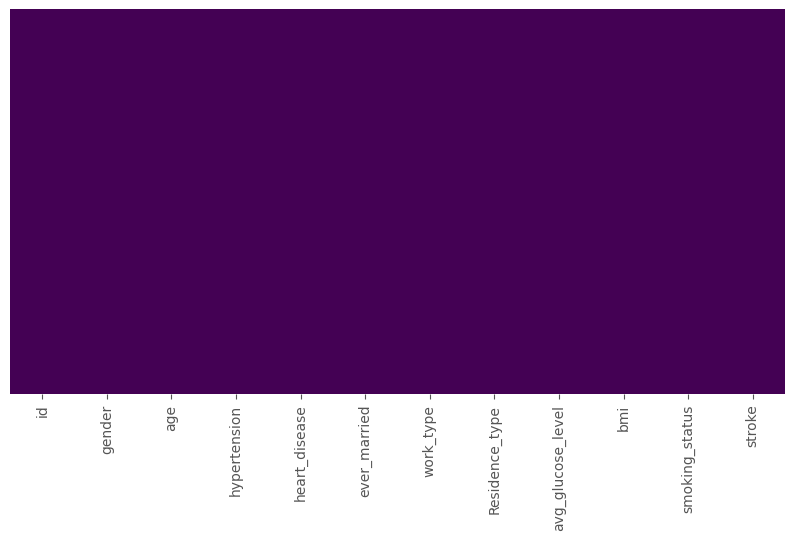

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(yticklabels=False, data=dataset.isnull(), cbar=False, cmap="viridis")
plt.show()

In [15]:

gender_count = dataset.groupby("gender")["gender"].count()

hypertension_count= dataset.groupby("hypertension")["hypertension"].count()

heart_disease = dataset.groupby("heart_disease")["heart_disease"].count()

gender_count, hypertension_count, heart_disease 



(gender
 Female    2994
 Male      2115
 Other        1
 Name: gender, dtype: int64,
 hypertension
 0    4612
 1     498
 Name: hypertension, dtype: int64,
 heart_disease
 0    4834
 1     276
 Name: heart_disease, dtype: int64)

In [16]:
stroke_count = dataset.groupby("stroke")["stroke"].count()
stroke_count



stroke
0    4861
1     249
Name: stroke, dtype: int64

### 4. Data Visualization

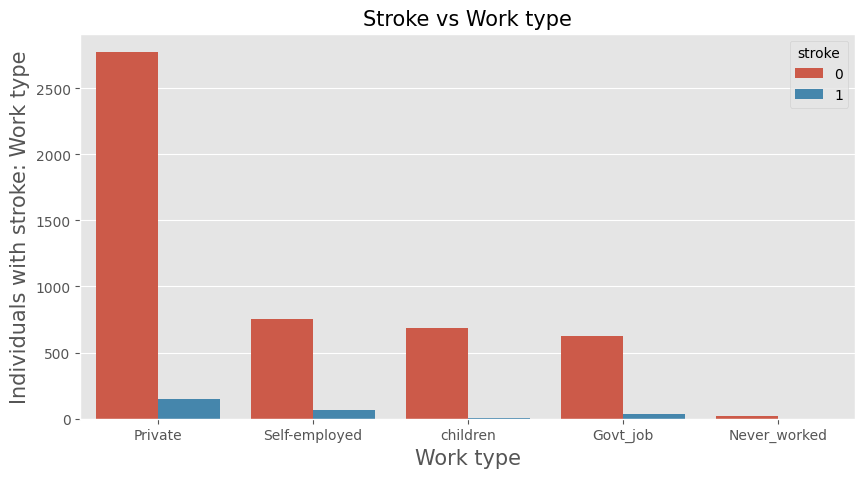

In [17]:
plt.subplots(figsize = (10,5))
sns.countplot(x=dataset['work_type'],order=dataset['work_type'].value_counts().index,hue=dataset['stroke'])
plt.title('Stroke vs Work type', fontsize=15)
plt.xlabel('Work type', fontsize=15)
plt.ylabel('Individuals with stroke: Work type', fontsize=15)

plt.show()

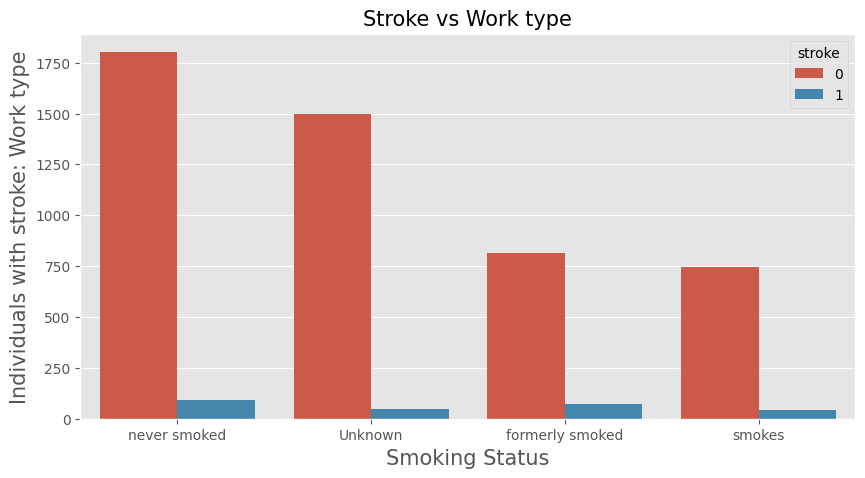

In [18]:
plt.subplots(figsize = (10,5))
sns.countplot(x=dataset['smoking_status'],order=dataset['smoking_status'].value_counts().index,hue=dataset['stroke'])
plt.title('Stroke vs Work type', fontsize=15)
plt.xlabel('Smoking Status', fontsize=15)
plt.ylabel('Individuals with stroke: Work type', fontsize=15)

plt.show()

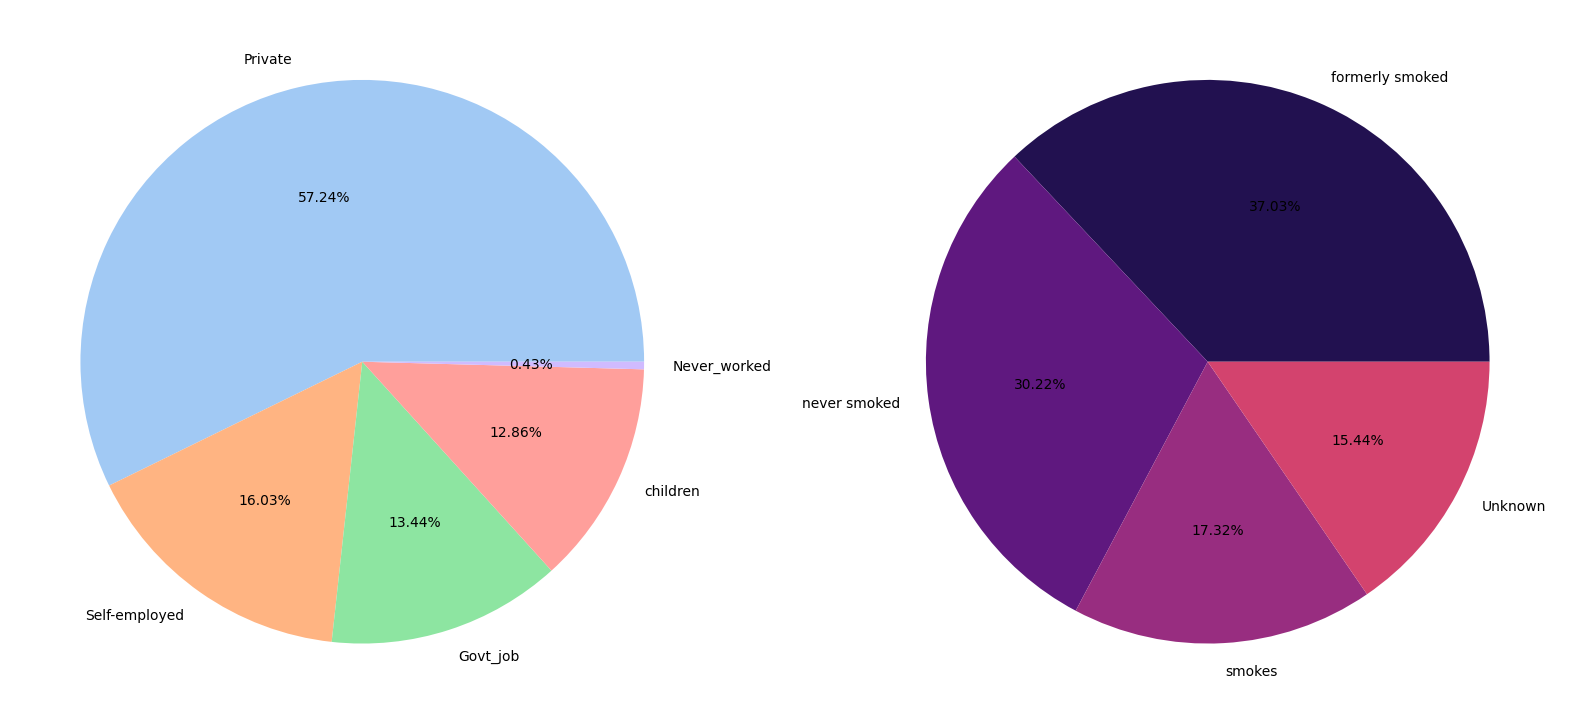

In [19]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
colors = sns.color_palette('pastel')
plt.pie([item/len(dataset.work_type) for item in dataset.work_type.value_counts()], labels=['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'], colors=colors, autopct='%.2f%%')
plt.subplot(1, 2, 2)
colors = sns.color_palette('magma')
plt.pie([item/len(dataset.work_type) for item in dataset.smoking_status.value_counts()], labels=['formerly smoked', 'never smoked', 'smokes', 'Unknown'], colors=colors, autopct='%.2f%%')
plt.show()

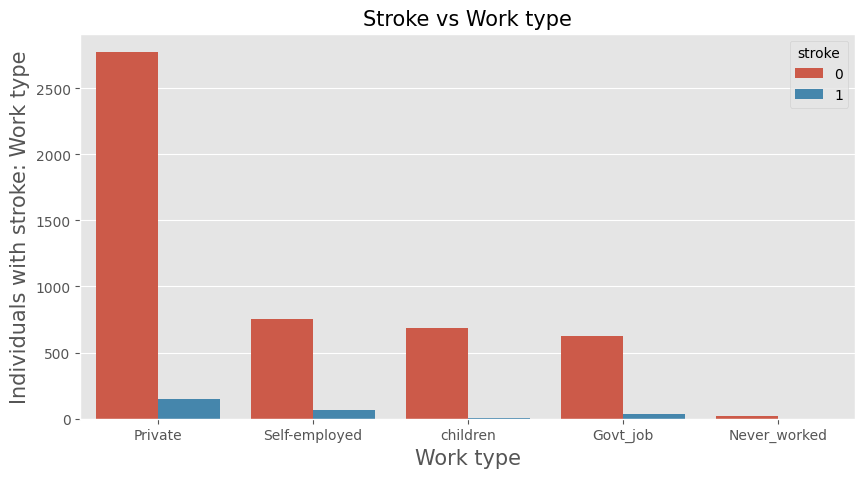

In [20]:
plt.subplots(figsize = (10,5))
sns.countplot(x=dataset['work_type'],order=dataset['work_type'].value_counts().index,hue=dataset['stroke'])
plt.title('Stroke vs Work type', fontsize=15)
plt.xlabel('Work type', fontsize=15)
plt.ylabel('Individuals with stroke: Work type', fontsize=15)

plt.show()


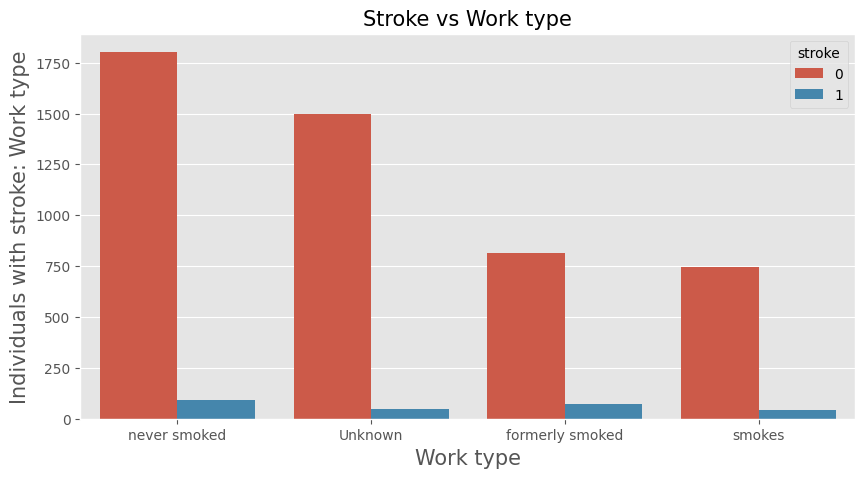

In [21]:
plt.subplots(figsize = (10,5))
sns.countplot(x=dataset['smoking_status'],order=dataset['smoking_status'].value_counts().index,hue=dataset['stroke'])
plt.title('Stroke vs Work type', fontsize=15)
plt.xlabel('Work type', fontsize=15)
plt.ylabel('Individuals with stroke: Work type', fontsize=15)

plt.show()

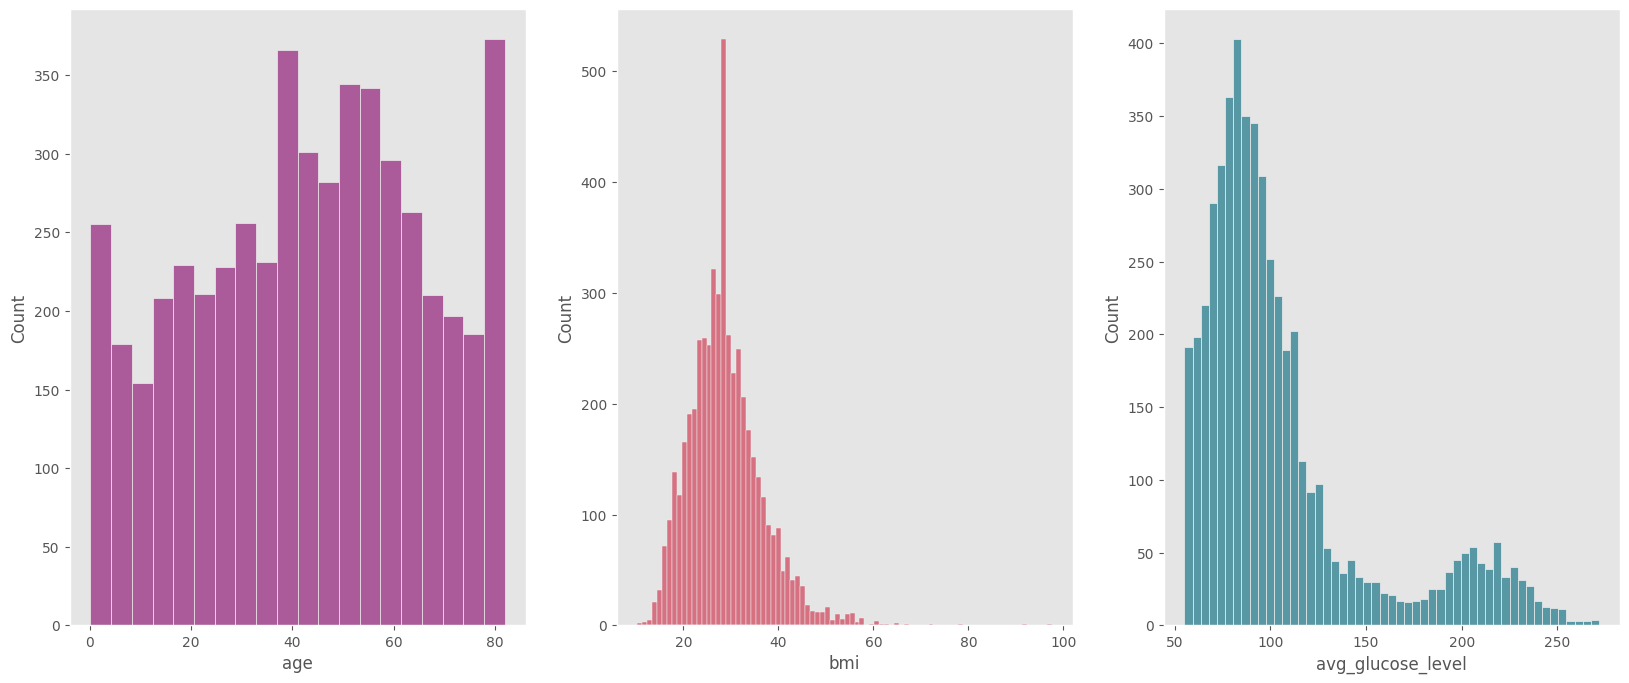

In [22]:
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
ax1 = sns.histplot(dataset.age, color=sns.color_palette('magma')[2])
plt.subplot(1, 3, 2)
ax2 = sns.histplot(dataset.bmi, color=sns.color_palette('flare')[2])
plt.subplot(1, 3, 3)
ax3 = sns.histplot(dataset.avg_glucose_level, color=sns.color_palette('viridis')[2])
ax1.grid(False)
ax2.grid(False)
ax3.grid(False)
plt.show()

### 5. Mengecek Korelasi Pada Data

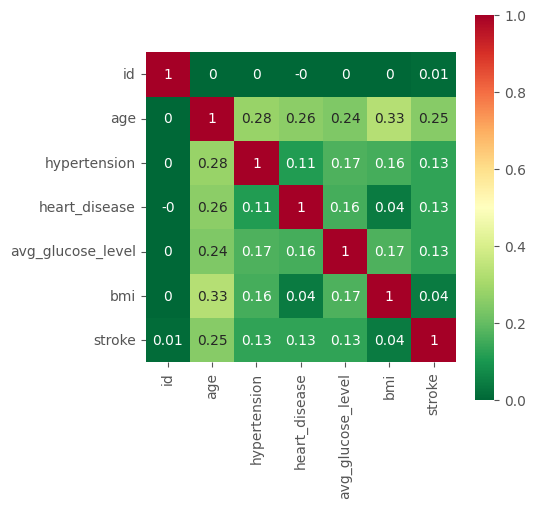

In [23]:
numeric_data = dataset.select_dtypes(include='number')
correlation = numeric_data.corr()
plt.subplots(figsize = (5,5))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

### 6. Mengecek Outiler Pada Data

### Temuan : Masih ada outiler dan harus dihilangkan

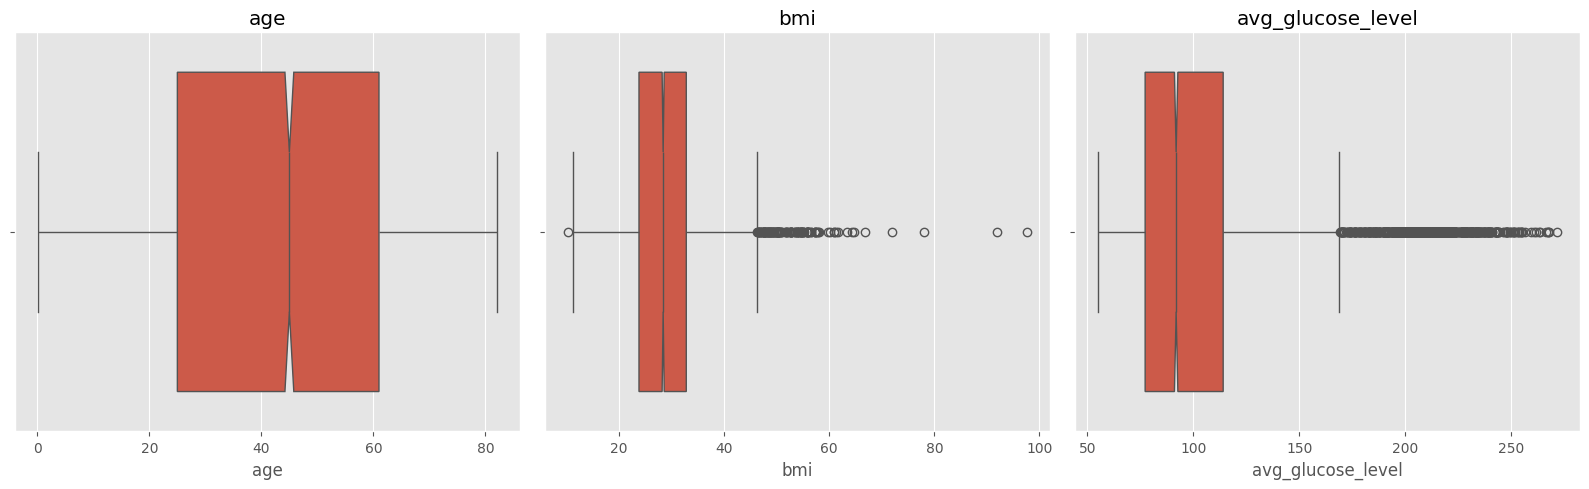

In [24]:
selected_columns = ['age','bmi','avg_glucose_level']

notch = True

fig, axes = plt.subplots(nrows=1, ncols=len(selected_columns), figsize=(16, 5))

for i, column in enumerate(selected_columns):
    sns.boxplot(x=dataset[column], ax=axes[i], notch=notch)
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

In [25]:
# digunakan untuk menghitung Rentang Interkuartil (Interquartile Range/IQR) dari suatu variabel dalam dataset, di mana variabel tersebut adalah 'Avg_Credit_Limit'.
Q1 = dataset['bmi'].quantile(0.25)
Q3 = dataset['bmi'].quantile(0.75)
IQR = Q3 - Q1
IQR

8.999999999999996

In [26]:
# menghitung batas bawah (bmi) dan batas atas (bmi) sebagai acuan dalam mendeteksi outlier dalam distribusi 'bmi'.
lower_limit  = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('lower limit is: ' , lower_limit)
print('Upper limit is: ' , upper_limit)

lower limit is:  10.300000000000006
Upper limit is:  46.29999999999999


In [27]:
outliers = dataset[(dataset['bmi'] < lower_limit) | (dataset['bmi'] > upper_limit)]

In [28]:
# digunakan untuk menggantikan nilai outlier dalam variabel 'bmi' dengan batas bawah (lower limit) atau batas atas (bmi) yang telah ditentukan.
dataset['bmi'] = np.where((dataset['bmi'] < lower_limit), lower_limit, dataset['bmi'])
dataset['bmi'] = np.where((dataset['bmi'] > upper_limit), upper_limit, dataset['bmi'])

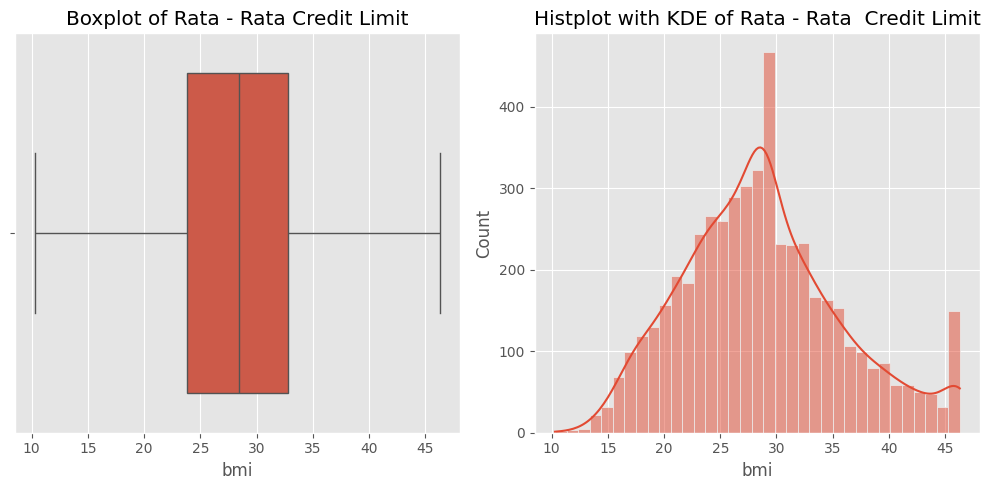

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))



sns.boxplot(x=dataset["bmi"], ax=axes[0])
axes[0].set_title("Boxplot of Rata - Rata Credit Limit")

sns.histplot(x=dataset["bmi"], ax=axes[1], kde=True)
axes[1].set_title("Histplot with KDE of Rata - Rata  Credit Limit")

plt.tight_layout()
plt.show()

In [30]:
# digunakan untuk menghitung Rentang Interkuartil (Interquartile Range/IQR) dari suatu variabel dalam dataset, di mana variabel tersebut adalah 'Avg_Credit_Limit'.
q1 = dataset['avg_glucose_level'].quantile(0.25)
q3 = dataset['avg_glucose_level'].quantile(0.75)
iqr= q3 - q1
iqr

36.845

In [31]:
Lower_Limit  = q1 - 1.5 * iqr
Upper_Limit = q3 + 1.5 * iqr
print('lower limit is: ' , Lower_Limit)
print('Upper limit is: ' , Upper_Limit)


outliers = dataset[(dataset['avg_glucose_level'] < Lower_Limit) | (dataset['avg_glucose_level'] > Upper_Limit)]

lower limit is:  21.977500000000006
Upper limit is:  169.35750000000002


In [32]:
# digunakan untuk menggantikan nilai outlier dalam variabel 'bmi' dengan batas bawah (lower limit) atau batas atas (bmi) yang telah ditentukan.
dataset['avg_glucose_level'] = np.where((dataset['avg_glucose_level'] < Lower_Limit), Lower_Limit, dataset['avg_glucose_level'])
dataset['avg_glucose_level'] = np.where((dataset['avg_glucose_level'] > Upper_Limit), Upper_Limit, dataset['avg_glucose_level'])

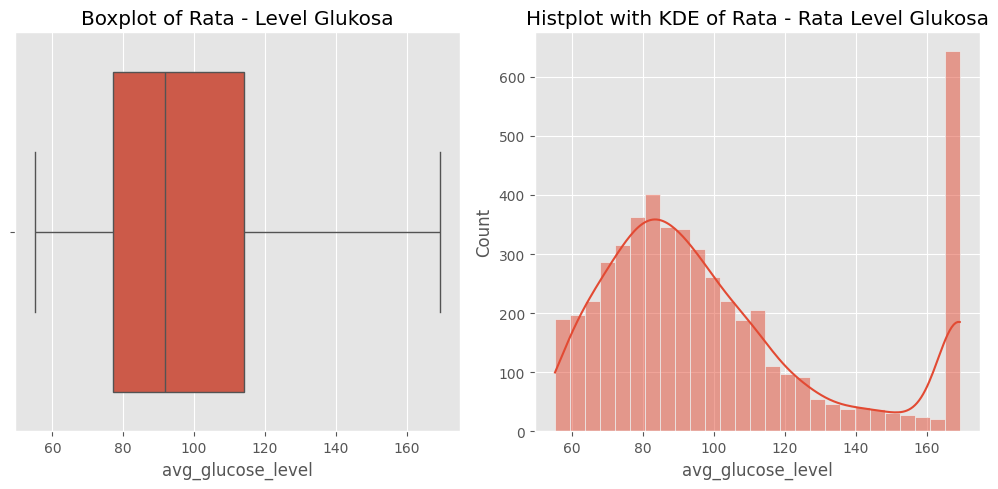

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))



sns.boxplot(x=dataset["avg_glucose_level"], ax=axes[0])
axes[0].set_title("Boxplot of Rata - Level Glukosa")

sns.histplot(x=dataset["avg_glucose_level"], ax=axes[1], kde=True)
axes[1].set_title("Histplot with KDE of Rata - Rata Level Glukosa")

plt.tight_layout()
plt.show()

### Sudah Tidak ada outiler pada kolom BMI dan Glucose Level selanjut nya kita bisa menerapkan mode decisiontree nya 



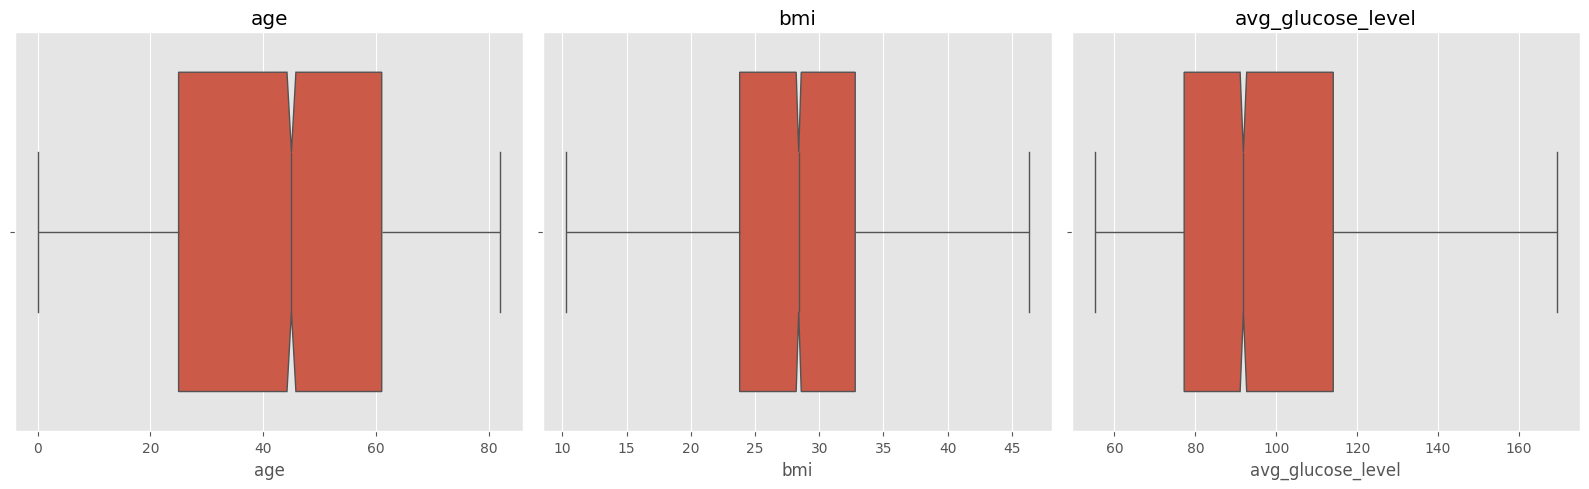

In [34]:
selected_columns = ['age','bmi','avg_glucose_level']

notch = True

fig, axes = plt.subplots(nrows=1, ncols=len(selected_columns), figsize=(16, 5))

for i, column in enumerate(selected_columns):
    sns.boxplot(x=dataset[column], ax=axes[i], notch=notch)
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

### 7. Preprocesing Data Sebelum Dilakukan DecisionTree dan RandomForest dengan X dan Y

In [35]:
dataset = pd.get_dummies(data =dataset , columns =  ['gender','ever_married','work_type','Residence_type','smoking_status'] ,drop_first=True )

In [36]:
x = dataset.drop(columns=['stroke'])
y = dataset['stroke'].astype(int)


In [37]:
from sklearn.preprocessing import StandardScaler
# Inisialisasi dan fitting StandardScaler
scaler = StandardScaler().fit(x)

# Melakukan transformasi data
x_scaled = scaler.transform(x)

In [38]:
####from sklearn.model_selection import train_test_split

###x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = .20)

from imblearn.combine import SMOTETomek
tomek=SMOTETomek()

x_test,y_test=tomek.fit_resample(x,y)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_test,y_test,test_size=0.25,random_state=0)

c:\Users\GAMING 3I\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\GAMING 3I\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\GAMING 3I\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 501, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\GAMING 3I\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 969, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\GAMING 3I\AppData\Local\Programs\Pytho

### 8. Menyeimbangkan Data 

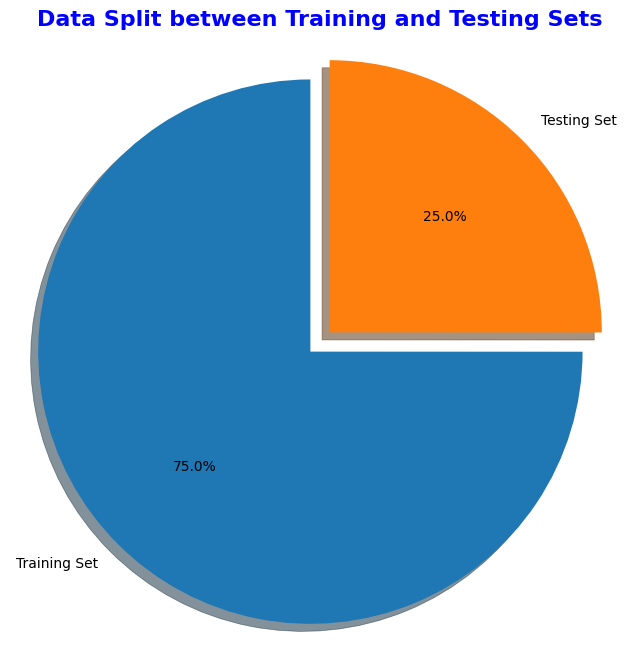

In [39]:
import matplotlib.pyplot as plt

def plot_data_split(y_train, y_test):
    train_size = len(y_train)
    test_size = len(y_test)

    sizes = [train_size, test_size]
    labels = ['Training Set', 'Testing Set']

    # Set up colors
    colors = ['#1f77b4', '#ff7f0e']  # Blue and orange

    # Set up explode
    explode = (0.1, 0)  # Explode the first slice (Training Set)

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=True)
    plt.title('Data Split between Training and Testing Sets', fontsize=16, color='blue', fontweight='bold')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()

# Contoh pemanggilan fungsi
plot_data_split(y_train, y_test)



### 9. Mulai Menggunakan Model DecisionTree

In [40]:
tree_model = DecisionTreeClassifier(criterion='entropy')
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [41]:
y_pred = tree_model.predict(x_test)


In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def evaluate_model(y_test, y_pred):
    # Menghitung metrik evaluasi
    dt_precision = precision_score(y_test, y_pred)
    dt_recall = recall_score(y_test, y_pred)
    dt_f1 = f1_score(y_test, y_pred)
    dt_acc = accuracy_score(y_test, y_pred)

    # Menyusun hasil evaluasi dalam satu blok teks
    evaluation_results = f"""
    Accuracy: {dt_acc}
    Precision: {dt_precision}
    Recall: {dt_recall}
    F1-score: {dt_f1}
    """

    # Mencetak hasil evaluasi
    print(evaluation_results)

# Contoh pemanggilan fungsi
evaluate_model(y_test, y_pred)



    Accuracy: 0.9082813891362422
    Precision: 0.8949615713065756
    Recall: 0.9266136162687887
    F1-score: 0.9105125977410947
    


In [43]:
print(f"Accuracy of Decision Tree Classifier: {accuracy_score(y_test, y_pred)*100}%")

Accuracy of Decision Tree Classifier: 90.82813891362423%


### 10. Mulai Mengggunakan Model RandomForest

In [44]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
random_forest.score(x_train, y_train)

1.0

### 11. Berikut adalah perbandingan Performa Dari Pengujian Menggunakan DecisionTree dan RandomForest

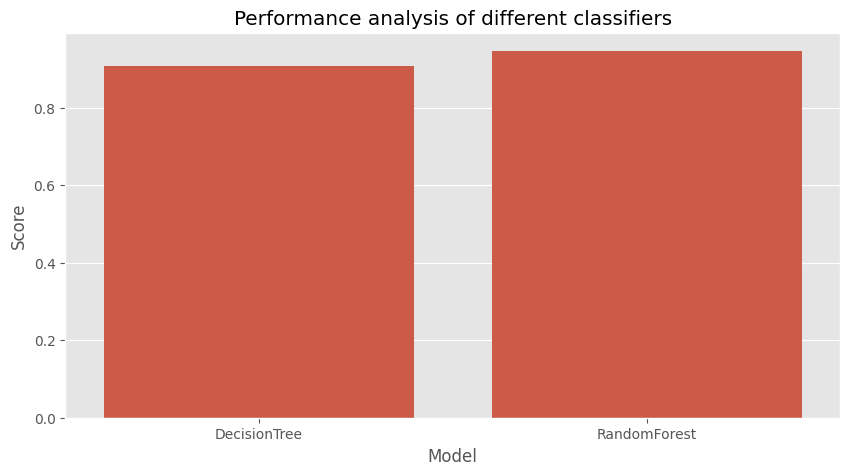

In [45]:
comparison = pd.DataFrame(data={'Model': ['DecisionTree', 'RandomForest'], 'Score': [ tree_model.score(x_test, y_test), random_forest.score(x_test, y_test)]})

plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Score", data=comparison)
plt.title('Performance analysis of different classifiers')
plt.show()

In [46]:
comparison

,Model,Score
0,DecisionTree,0.908281
1,RandomForest,0.945681


### 12. Melakukan Uji Hyperparameter Tuning Pada Yang Sebelum nya Di Gunakan

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_n_estimators = [int(x) for x in np.linspace(100, 1000, 5)]

# Jumlah maksimum level dalam randomforest
rf_max_depth = [int(x) for x in np.linspace(5, 55, 11)]
# Tambahkan default sebagai nilai yang memungkinkan
rf_max_depth.append(None)

# Jumlah fitur yang perlu dipertimbangkan pada setiap pemisahan
rf_max_features = ['sqrt', 'log2']

# Kriteria yang akan dibagi
rf_criterion = ['gini','entropy']

# Jumlah sampel minimum yang diperlukan untuk membagi sebuah simpul
rf_min_samples_split = [int(x) for x in np.linspace(2, 10, 9)]

# Penurunan minimum pengotor yang diperlukan agar pemisahan dapat terjadi
rf_min_impurity_decrease = [0.0, 0.05, 0.1]

# Metode pemilihan sampel untuk melatih setiap randomforest
rf_bootstrap = [True, False]

# membuat grid
rf_grid = {'n_estimators': rf_n_estimators,
               'max_depth': rf_max_depth,
               'max_features': rf_max_features,
               'criterion': rf_criterion,
               'min_samples_split': rf_min_samples_split,
               'min_impurity_decrease': rf_min_impurity_decrease,
               'bootstrap': rf_bootstrap}



rf_base = RandomForestClassifier()

# Membuat pencarian acak Random Forest
rf_random = RandomizedSearchCV(estimator = rf_base, param_distributions = rf_grid, 
                               n_iter = 10, cv = 10, verbose = 2, random_state = 42, 
                               n_jobs = -1)

# Cocokkan model pencarian acak
rf_random.fit(x_test, y_test)

# Melihat parameter terbaik dari pencarian acak
rf_random.best_params_


Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'n_estimators': 325,
 'min_samples_split': 5,
 'min_impurity_decrease': 0.05,
 'max_features': 'log2',
 'max_depth': 10,
 'criterion': 'gini',
 'bootstrap': True}

In [48]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators= 1000,
 min_samples_split= 5,
 min_impurity_decrease= 0.05,
 max_features= 'sqrt',
 max_depth= 50,
 criterion= 'entropy',
 bootstrap= True)

forest.fit(x_train,y_train)

y_pred=forest.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.74      0.81      1115
           1       0.78      0.90      0.84      1131

    accuracy                           0.82      2246
   macro avg       0.83      0.82      0.82      2246
weighted avg       0.83      0.82      0.82      2246



In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Jumlah fitur yang perlu dipertimbangkan pada setiap pemisahan
dt_max_features = ['sqrt', 'log2', None]

# Kriteria yang akan dibagi
dt_criterion = ['gini', 'entropy']

# Jumlah maksimum level dalam pohon
dt_max_depth = [int(x) for x in np.linspace(5, 55, 11)]
# Tambahkan default sebagai nilai yang memungkinkan
dt_max_depth.append(None)

# Jumlah sampel minimum yang diperlukan untuk membagi sebuah simpul
dt_min_samples_split = [int(x) for x in np.linspace(2, 10, 9)]

# Penurunan minimum pengotor yang diperlukan agar pemisahan dapat terjadi
dt_min_impurity_decrease = [0.0, 0.05, 0.1]

# Buat grid
dt_grid = {'criterion': dt_criterion,
           'max_depth': dt_max_depth,
           'min_samples_split': dt_min_samples_split,
           'min_impurity_decrease': dt_min_impurity_decrease,
           'max_features': dt_max_features}


In [50]:
dt_base = DecisionTreeClassifier()

# Membuat pencarian acak DecisionTreeClassifier
dt_random = RandomizedSearchCV(estimator=dt_base, param_distributions=dt_grid,
                               n_iter=10, cv=10, verbose=2, random_state=42,
                               n_jobs=-1)

# Sesuaikan mode pencarian acak
dt_random.fit(x_test, y_test)

# Melihat parameter terbaik dari pencarian acak
dt_random.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'min_samples_split': 3,
 'min_impurity_decrease': 0.0,
 'max_features': 'sqrt',
 'max_depth': 35,
 'criterion': 'entropy'}

In [51]:
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi DecisionTreeClassifier dengan parameter yang ditentukan
tree = DecisionTreeClassifier(min_samples_split=3,
min_impurity_decrease=0.0,
max_features='sqrt',
max_depth=35,
criterion='entropy')

# # Cocokkan DecisionTreeClassifier
tree.fit(x_train, y_train)

# Memprediksi menggunakan DecisionTreeClassifier terlatih
y_pred = tree.predict(x_test)

# Mengevaluasi kinerja DecisionTreeClassifier
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1115
           1       0.92      0.90      0.91      1131

    accuracy                           0.91      2246
   macro avg       0.91      0.91      0.91      2246
weighted avg       0.91      0.91      0.91      2246



### 13. Hasil dari Perbandingan Pengujian Menggunakan Hyperparameter Tuning Pada Model DeciionTree dan RandomForest

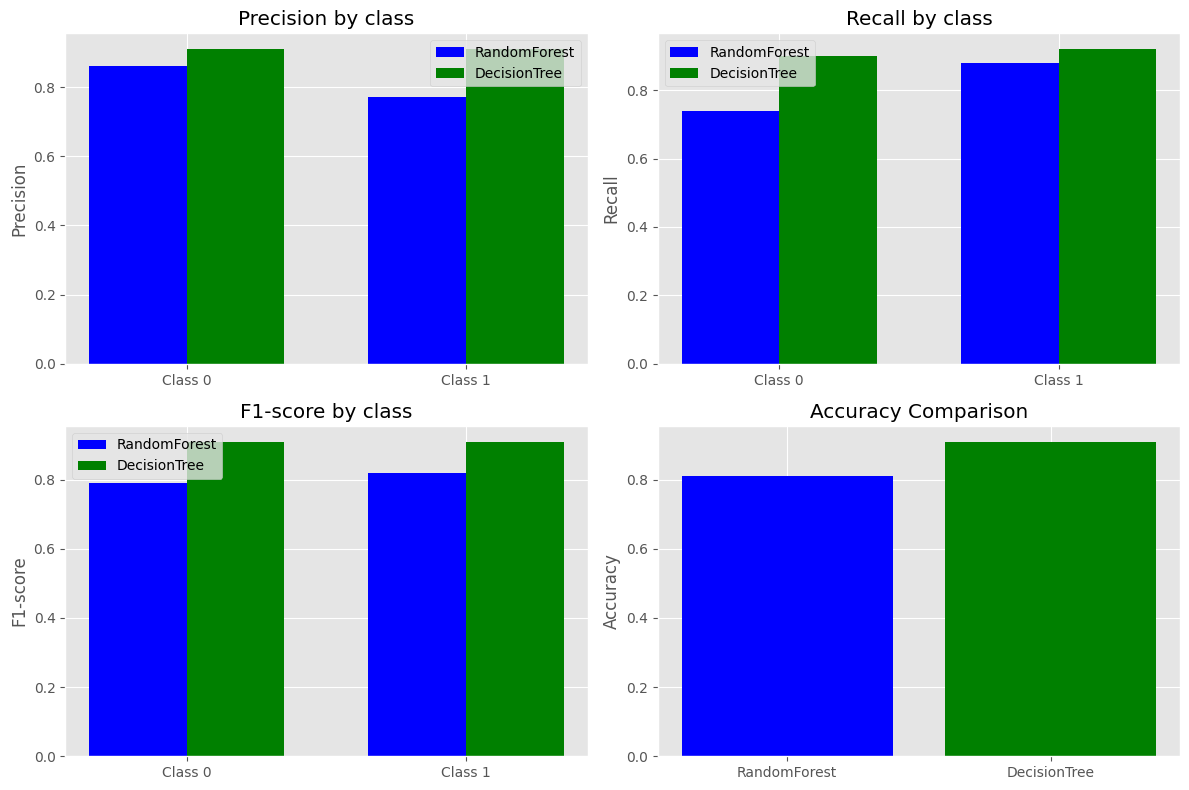

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Data hasil dari RandomForestClassifier
rf_precision = [0.86, 0.77]
rf_recall = [0.74, 0.88]
rf_f1_score = [0.79, 0.82]
rf_accuracy = 0.81

# Data hasil dari DecisionTreeClassifier
dt_precision = [0.91, 0.91]
dt_recall = [0.90, 0.92]
dt_f1_score = [0.91, 0.91]
dt_accuracy = 0.91

# Labels untuk kelas
labels = ['Class 0', 'Class 1']

# Plotting
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Plot precision
ax[0, 0].bar(x - width/2, rf_precision, width, label='RandomForest', color='b')
ax[0, 0].bar(x + width/2, dt_precision, width, label='DecisionTree', color='g')
ax[0, 0].set_ylabel('Precision')
ax[0, 0].set_title('Precision by class')
ax[0, 0].set_xticks(x)
ax[0, 0].set_xticklabels(labels)
ax[0, 0].legend()

# Plot recall
ax[0, 1].bar(x - width/2, rf_recall, width, label='RandomForest', color='b')
ax[0, 1].bar(x + width/2, dt_recall, width, label='DecisionTree', color='g')
ax[0, 1].set_ylabel('Recall')
ax[0, 1].set_title('Recall by class')
ax[0, 1].set_xticks(x)
ax[0, 1].set_xticklabels(labels)
ax[0, 1].legend()

# Plot F1-score
ax[1, 0].bar(x - width/2, rf_f1_score, width, label='RandomForest', color='b')
ax[1, 0].bar(x + width/2, dt_f1_score, width, label='DecisionTree', color='g')
ax[1, 0].set_ylabel('F1-score')
ax[1, 0].set_title('F1-score by class')
ax[1, 0].set_xticks(x)
ax[1, 0].set_xticklabels(labels)
ax[1, 0].legend()

# Plot accuracy
accuracy_labels = ['RandomForest', 'DecisionTree']
accuracy_scores = [rf_accuracy, dt_accuracy]
ax[1, 1].bar(accuracy_labels, accuracy_scores, color=['b', 'g'])
ax[1, 1].set_ylabel('Accuracy')
ax[1, 1].set_title('Accuracy Comparison')

plt.tight_layout()
plt.show()


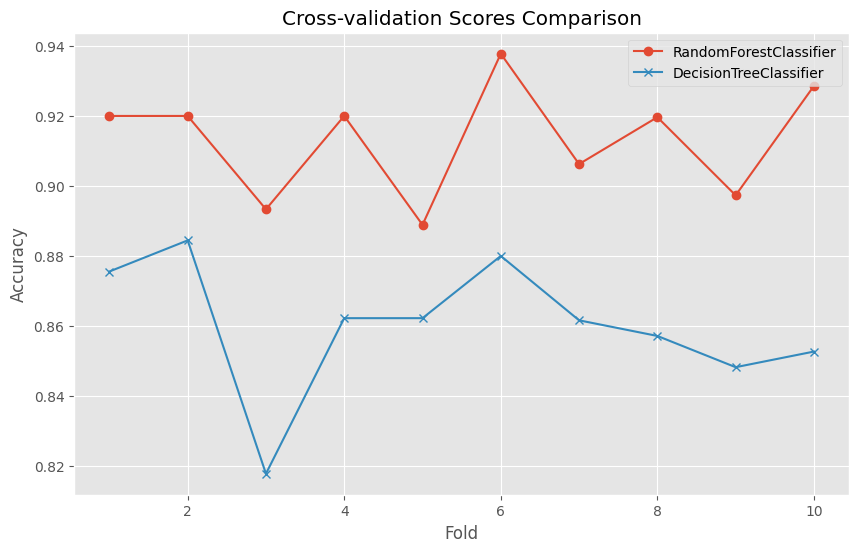

Mean cross-validation score for RandomForestClassifier: 0.9131785714285714
Mean cross-validation score for DecisionTreeClassifier: 0.860186507936508


In [53]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi model RandomForestClassifier dan DecisionTreeClassifier
forest = RandomForestClassifier()
tree = DecisionTreeClassifier()

# Cross-validation scores untuk RandomForestClassifier
rf_cv_scores = cross_val_score(forest, x_test, y_test, cv=10, scoring='accuracy')

# Cross-validation scores untuk DecisionTreeClassifier
dt_cv_scores = cross_val_score(tree, x_test, y_test, cv=10, scoring='accuracy')

# Menampilkan cross-validation scores dengan menggunakan matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(range(1, 11), rf_cv_scores, label='RandomForestClassifier', marker='o')
ax.plot(range(1, 11), dt_cv_scores, label='DecisionTreeClassifier', marker='x')

ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title('Cross-validation Scores Comparison')
ax.legend()

plt.show()

# Menampilkan mean cross-validation scores
print("Mean cross-validation score for RandomForestClassifier:", np.mean(rf_cv_scores))
print("Mean cross-validation score for DecisionTreeClassifier:", np.mean(dt_cv_scores))



### 14. Di Atas adalah Merupakan Pengujian Cross Validation

#### Temuan : Untuk score pada Crossvalidation di menangkan oleh RandomForest sedang uji pada score perbandingan HyperParamter di menangkan oleh DecisionTreee